In [ ]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

def plot_results(axes, results_df, dataset, learner):
    
    axes.scatter(results_df["prediction_score"],
                 results_df["assay_score"], color=np.random.rand(3,))
    axes.set_title(f'{dataset}/{learner}')
    axes.set_ylabel('Assay Value')
    axes.set_xlabel('Prediction')


In [ ]:
import os

import context  # noqa: F401
from msalde.container import ALDEContainer

datasets = ["cas12f2"]
container = ALDEContainer("./config/msalde.yaml")
repo = container.query_repository
cols = 2

num_rows = (len(datasets) * cols) // cols + (len(datasets) % cols > 0)
fig, axes = plt.subplots(num_rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    llr_results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="ESM2_LLR")
    ind = i
    # ind += 1
    plot_results(axes[ind], llr_results, dataset, "LogLikelihood")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


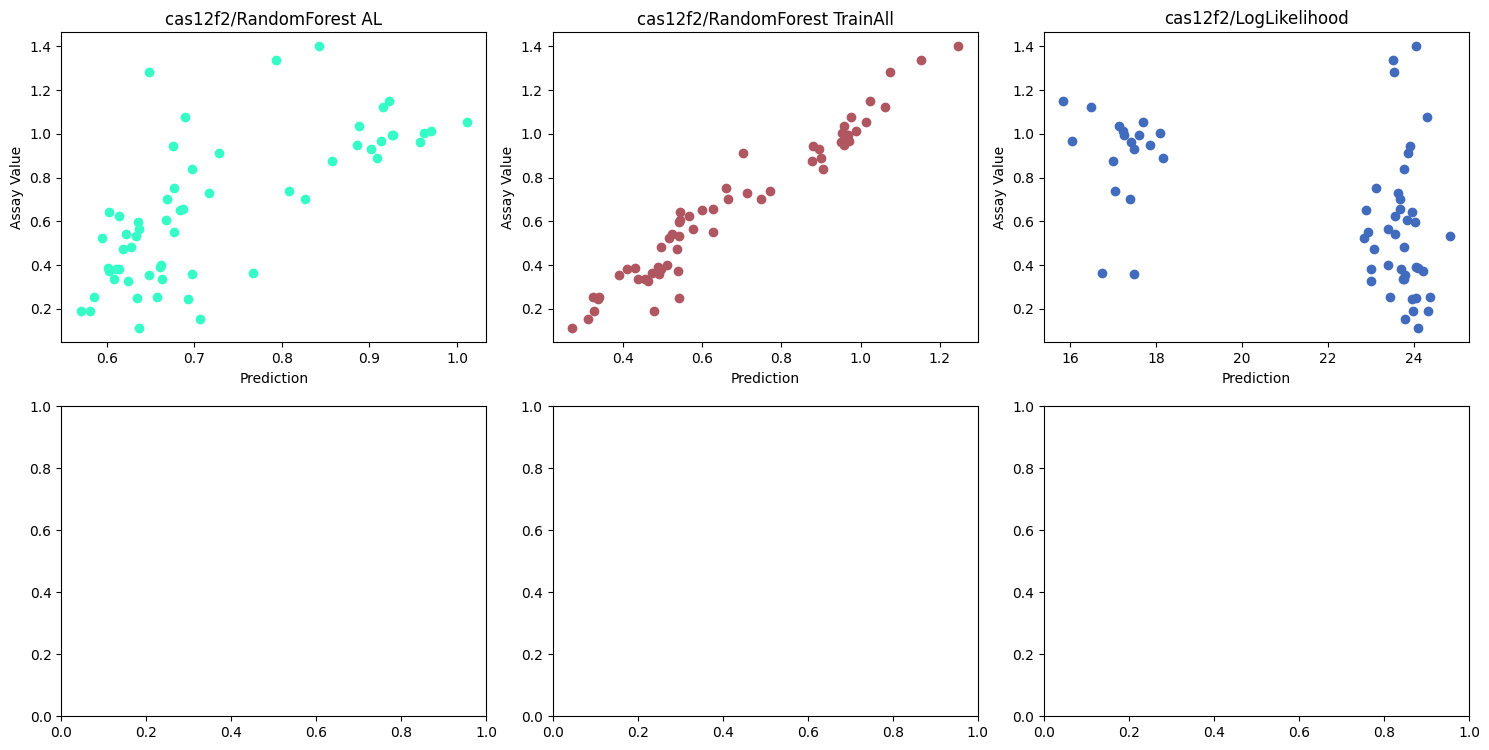

In [7]:
import context  # noqa: F401
from msalde.container import ALDEContainer

datasets = ["cas12f2"]
container = ALDEContainer()
repo = container.query_repository

num_rows = (len(datasets) * 3) // 3 + (len(datasets) % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 8))
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="RF_AL")
    ind = i * 3
    plot_results(axes[ind], results, dataset, "RandomForest AL")
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="RFTRAIN_ALL")
    ind += 1
    plot_results(axes[ind], results, dataset, "RandomForest TrainAll")
    results = repo.get_top_variants_by_dataset_learner(
        dataset_name=dataset, learner_name="ESM2_LLR")
    ind += 1
    plot_results(axes[ind], results, dataset, "LogLikelihood")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
